In [1]:
from matplotlib import pyplot as plt
from matplotlib import colors
from cartopy import crs as ccrs
import netCDF4 as nc
import numpy as np
%matplotlib inline

### Load and prepare data

In [2]:
psifname = '/global/cfs/projectdirs/m3522/cmip6/ERA5/e5.generated_psi/2018/psi_20180601.nc'
psi2018 = nc.Dataset(psifname, 'r', format='NETCDF4')

tpfname = '/global/cfs/projectdirs/m3522/cmip6/ERA5/e5.generated_tp/ERA5_IVT_tp_reanalysis_2012.nc'  
tp2012 = nc.Dataset(tpfname, 'r', format='NETCDF4')

In [3]:
# define the extent of the data, with the antimeridian as 0
extent = [-75, 85, -15, 75]

lon = psi2018.variables['longitude'][:]
lat = psi2018.variables['latitude'][:]

# extract longitude extent (recall that lon ranges from 0 to 360 in these datasets)
x_idx = np.intersect1d(np.where(lon >= extent[0] + 180), np.where(lon <= extent[1] + 180))
x = lon[x_idx]

# extract latitude extent
y_idx = np.intersect1d(np.where(lat >= extent[2]), np.where(lat <= extent[3]))
y = lat[y_idx]

psi = psi2018.variables['streamfunction'][12, 16, :, :]
psi_z = psi[y_idx, :][:, x_idx]

tp = np.sum(tp2012.variables['tp'][:744, :, :], axis=0)
tp_z = tp[y_idx, :][:, x_idx]

### Contour plot of atmosphere horizontal streamfunction at 500 millibars

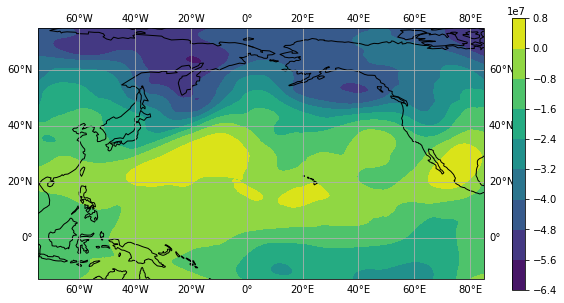

In [4]:
fig = plt.figure(figsize=(10, 5))
proj = ccrs.PlateCarree(central_longitude=-180.0)
ax = fig.add_subplot(1, 1, 1, projection=proj)
ax.set_extent(extent, crs=proj)
ax.coastlines()
ax.gridlines(draw_labels=True, crs=proj)
filled_c = ax.contourf(x, y, psi_z, transform=ccrs.PlateCarree())
fig.colorbar(filled_c, orientation='vertical')
plt.show()

### Contour plot of total precipitation (IVT) for January 2012

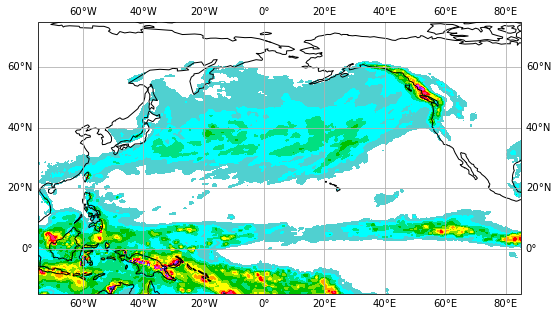

In [5]:
fig = plt.figure(figsize=(10, 5))
proj = ccrs.PlateCarree(central_longitude=-180.0)
ax = fig.add_subplot(1, 1, 1, projection=proj)
ax.set_extent(extent, crs=proj)
ax.coastlines()
ax.gridlines(draw_labels=True, crs=proj)

clevs = np.linspace(0, np.amax(tp_z), 21)
cmap_data = [(1.0, 1.0, 1.0),
             (0.3137255012989044, 0.8156862854957581, 0.8156862854957581),
             (0.0, 1.0, 1.0),
             (0.0, 0.8784313797950745, 0.501960813999176),
             (0.0, 0.7529411911964417, 0.0),
             (0.501960813999176, 0.8784313797950745, 0.0),
             (1.0, 1.0, 0.0),
             (1.0, 0.6274510025978088, 0.0),
             (1.0, 0.0, 0.0),
             (1.0, 0.125490203499794, 0.501960813999176),
             (0.9411764740943909, 0.250980406999588, 1.0),
             (0.501960813999176, 0.125490203499794, 1.0),
             (0.250980406999588, 0.250980406999588, 1.0),
             (0.125490203499794, 0.125490203499794, 0.501960813999176),
             (0.125490203499794, 0.125490203499794, 0.125490203499794),
             (0.501960813999176, 0.501960813999176, 0.501960813999176),
             (0.8784313797950745, 0.8784313797950745, 0.8784313797950745),
             (0.9333333373069763, 0.8313725590705872, 0.7372549176216125),
             (0.8549019694328308, 0.6509804129600525, 0.47058823704719543),
             (0.6274510025978088, 0.42352941632270813, 0.23529411852359772),
             (0.4000000059604645, 0.20000000298023224, 0.0)]
cmap = colors.ListedColormap(cmap_data, 'precipitation')
norm = colors.BoundaryNorm(clevs, cmap.N)

filled_c = ax.contourf(x, y, tp_z, clevs, cmap=cmap, norm=norm, transform=ccrs.PlateCarree())
plt.show()